<a href="https://colab.research.google.com/github/mikeffendii/Tesla-Stock-Prediction/blob/main/Tesla%20Stock%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [16]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [17]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

In [18]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [19]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [20]:
df = pd.read_csv("TSLA.csv")

In [21]:
#read_csv function from pandas

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-13,32.900002,35.042000,32.799999,34.990665,34.990665,397764000
1,2020-01-14,36.284000,36.493999,34.993332,35.861332,35.861332,434943000
2,2020-01-15,35.317333,35.855999,34.452667,34.566666,34.566666,260532000
3,2020-01-16,32.916668,34.297333,32.811333,34.232666,34.232666,326050500
4,2020-01-17,33.840668,34.377998,33.543999,34.033333,34.033333,204436500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [24]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02
mean,207.486636,212.333458,202.072932,207.257898,207.257898,1.310163e+08
std,94.967415,96.929376,92.667827,94.774567,94.774567,9.876195e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,138.741669,142.261665,135.626670,138.703331,138.703331,6.888915e+07
50%,224.000000,229.330002,218.199997,223.656662,223.656662,9.433620e+07
75%,278.460007,283.491669,270.511658,276.763337,276.763337,1.578812e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [25]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [26]:
px.area(df, x="Date", y="Close")

In [27]:
px.line(df, x="Date", y="Close")

In [28]:
px.area(df, x="Date", y="Volume")

In [29]:
px.bar(df, x="Date", y="Volume")

In [30]:
px.box(df, y="Close")

# Understanding Facebook Prophet

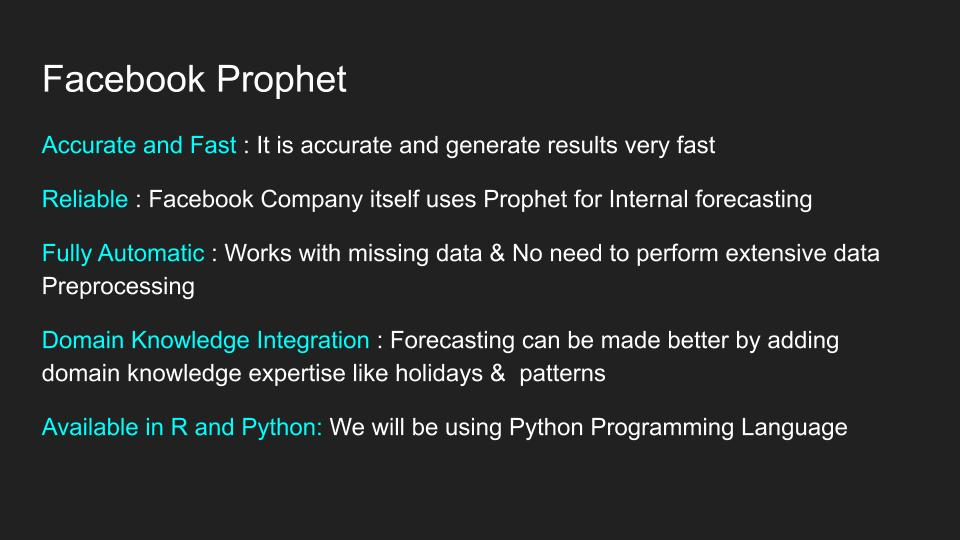

## Data Preperation

In [31]:
columns = ['Date', 'Close']
n_df = pd.DataFrame(df, columns = columns)
n_df.head()

,Date,Close
0,2020-01-13,34.990665
1,2020-01-14,35.861332
2,2020-01-15,34.566666
3,2020-01-16,34.232666
4,2020-01-17,34.033333


In [32]:
pro_df = n_df.rename(columns = {'Date': 'ds', 'Close': 'y'})
pro_df.head()

,ds,y
0,2020-01-13,34.990665
1,2020-01-14,35.861332
2,2020-01-15,34.566666
3,2020-01-16,34.232666
4,2020-01-17,34.033333


## Creating Facebook Prophet Model

In [33]:
model = Prophet()
model.fit(pro_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg86nkak7/p8i24xw8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg86nkak7/jipv_u3m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31941', 'data', 'file=/tmp/tmpg86nkak7/p8i24xw8.json', 'init=/tmp/tmpg86nkak7/jipv_u3m.json', 'output', 'file=/tmp/tmpg86nkak7/prophet_modelrmctskik/prophet_model-20230111143842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:38:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-13,14.859896,20.167064,91.929670,14.859896,14.859896,41.284785,41.284785,41.284785,-2.765059,-2.765059,-2.765059,44.049844,44.049844,44.049844,0.0,0.0,0.0,56.144680
1,2020-01-14,15.381702,18.706920,89.522391,15.381702,15.381702,40.174465,40.174465,40.174465,-4.278625,-4.278625,-4.278625,44.453090,44.453090,44.453090,0.0,0.0,0.0,55.556167
2,2020-01-15,15.903507,21.985539,92.262993,15.903507,15.903507,41.135758,41.135758,41.135758,-3.448981,-3.448981,-3.448981,44.584739,44.584739,44.584739,0.0,0.0,0.0,57.039266
3,2020-01-16,16.425313,21.353461,93.908557,16.425313,16.425313,40.143510,40.143510,40.143510,-4.312581,-4.312581,-4.312581,44.456091,44.456091,44.456091,0.0,0.0,0.0,56.568824
4,2020-01-17,16.947119,20.018873,89.707303,16.947119,16.947119,38.828549,38.828549,38.828549,-5.255471,-5.255471,-5.255471,44.084020,44.084020,44.084020,0.0,0.0,0.0,55.775668


##Forecasting

In [36]:
px.line(forecast, x='ds', y='yhat')

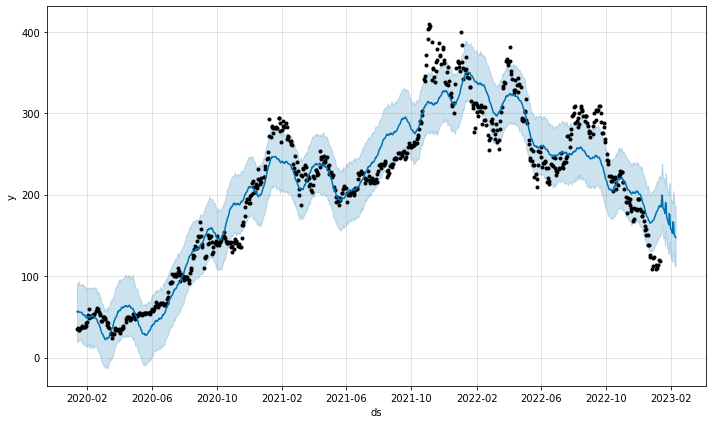

In [41]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

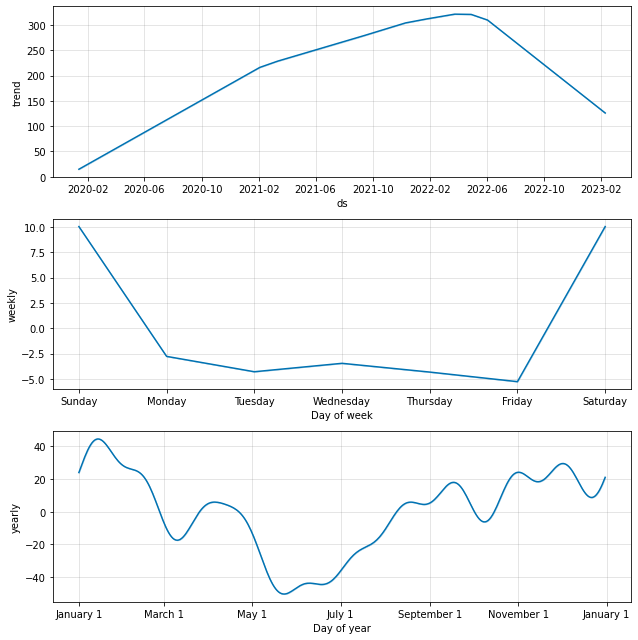

In [42]:
figure2 = model.plot_components(forecast)

##Downloading the Forecast data

In [43]:
from google.colab import files
forecast.to_csv("Forecast.csv")
files.download("Forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>